In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import re
import random

In [4]:
sns.set_style('whitegrid')

In [5]:
# read in the data
df = pd.read_excel('2019_Data_Professional_Salary_Survey_Responses.xlsx')

# data preprocessing
df = df[2:]
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

df.head()

2,Survey Year,Timestamp,SalaryUSD,Country,PostalCode,PrimaryDatabase,YearsWithThisDatabase,OtherDatabases,EmploymentStatus,JobTitle,...,HoursWorkedPerWeek,TelecommuteDaysPerWeek,PopulationOfLargestCityWithin20Miles,EmploymentSector,LookingForAnotherJob,CareerPlansThisYear,Gender,OtherJobDuties,KindsOfTasksPerformed,Counter
3,2017,2017-01-05 05:10:20.451000,200000,United States,Not Asked,Microsoft SQL Server,10,MySQL/MariaDB,Full time employee,DBA,...,45,1,Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1
4,2017,2017-01-05 05:26:23.388000,61515,United Kingdom,Not Asked,Microsoft SQL Server,15,"Oracle, PostgreSQL",Full time employee,DBA,...,35,2,Not Asked,Private business,No,Not Asked,Not Asked,Not Asked,Not Asked,1
5,2017,2017-01-05 05:32:57.367000,95000,Germany,Not Asked,Microsoft SQL Server,5,"Oracle, MySQL/MariaDB, Informix",Full time employee,Other,...,45,"None, or less than 1 day per week",Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1
6,2017,2017-01-05 05:33:03.316000,56000,United Kingdom,Not Asked,Microsoft SQL Server,6,NaN,Full time employee,DBA,...,40,1,Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1
7,2017,2017-01-05 05:34:33.866000,35000,France,Not Asked,Microsoft SQL Server,10,Oracle,Full time employee of a consulting/contracting...,DBA,...,40,"None, or less than 1 day per week",Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1


In [6]:
df['SalaryUSD'] = df['SalaryUSD'].apply(lambda x:str(x))

In [7]:
def fix_salary(x):
    y = ''.join([i for i in x.split()])
    return float(''.join([i for i in y.split(',')]))

In [8]:
df['SalaryUSD'] = df['SalaryUSD'].apply(fix_salary)

In [9]:
df['Survey Year'] = pd.to_numeric(df['Survey Year'])
df['YearsWithThisDatabase'] = pd.to_numeric(df['YearsWithThisDatabase'])
df['YearsWithThisTypeOfJob'] = pd.to_numeric(df['YearsWithThisTypeOfJob'])
df['DatabaseServers'] = pd.to_numeric(df['DatabaseServers'])
df['HoursWorkedPerWeek'] = pd.to_numeric(df['HoursWorkedPerWeek'])

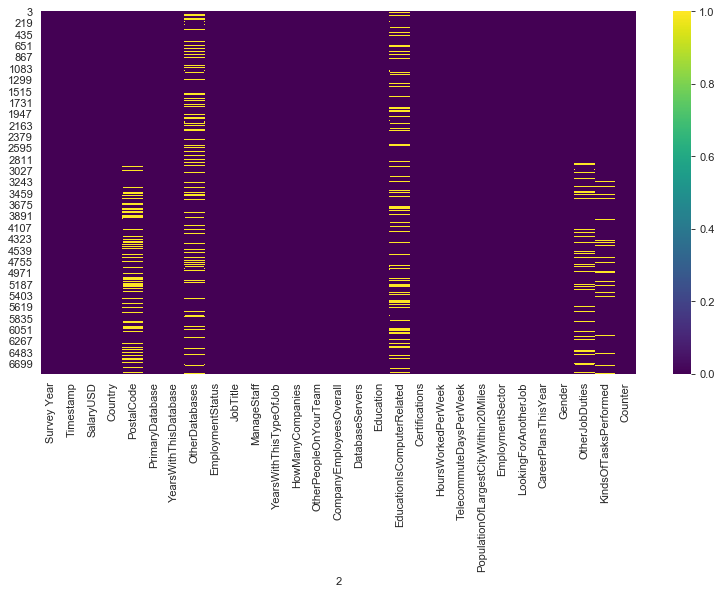

In [10]:
plt.figure(figsize=(12,6), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(df.isnull(), cmap = 'viridis')

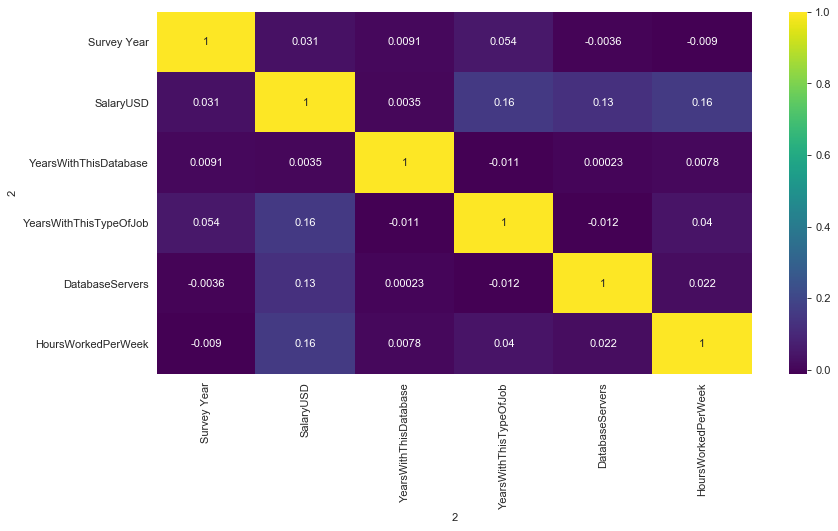

In [11]:
plt.figure(figsize=(12,6), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(df.corr(), cmap = 'viridis', annot = True)

## Grouping JobTitles

In [12]:
def job_processor(mystring):
    mystring = mystring.lower()
    
    check_list = ['dba', 'database', 'developer', 'engineer', 'consultant']
    
    for profession in check_list:
        if re.findall(profession, mystring):
            if profession == 'database':
                return 'dba'
            else:
                return profession
            
    return mystring

In [13]:
df['job'] = df['JobTitle'].apply(job_processor)

In [14]:
pd.DataFrame(df.groupby('job').describe()['SalaryUSD']).reset_index().sort_values(by = 'mean', ascending = False)

,job,count,mean,std,min,25%,50%,75%,max
9,sales,1.0,300000.000000,NaN,300000.000,300000.0,300000.0,300000.0,300000.0
1,architect,533.0,119307.350844,46112.885830,58.000,90000.0,120000.0,140000.0,350000.0
7,manager,394.0,114933.818528,67564.747006,1967.000,82875.0,110000.0,135000.0,1000000.0
2,consultant,3.0,114333.333333,49943.301186,61000.000,91500.0,122000.0,141000.0,160000.0
3,data scientist,28.0,111428.321429,48374.649081,45000.000,74000.0,111000.0,136750.0,225000.0
6,engineer,301.0,100265.285714,61854.772507,7500.000,70000.0,95000.0,120000.0,650000.0
4,dba,3529.0,91164.300218,55185.913370,56.000,65000.0,90000.0,112840.0,1450000.0
8,other,107.0,88953.176822,64180.742342,3600.000,59000.0,80000.0,97000.0,486000.0
10,systems administrator,2.0,85500.000000,707.106781,85000.000,85250.0,85500.0,85750.0,86000.0
5,developer,1640.0,84733.769138,53436.412575,0.000,60000.0,82985.0,105000.0,1375000.0


## Education

In [15]:
df1 = df.groupby('Education').describe()['SalaryUSD'].reset_index()
df2 = df.groupby('Education').describe()['YearsWithThisTypeOfJob'].reset_index()
df1['Avg Experience'] = df2['mean']
df1

,Education,count,mean,std,min,25%,50%,75%,max,Avg Experience
0,Associates (2 years),764.0,87723.073233,54720.333681,577.000,62000.0,84000.0,108000.0,960000.0,7.252618
1,Bachelors (4 years),3658.0,94164.610678,56170.882614,56.000,67000.0,90968.5,115000.0,1450000.0,6.968289
2,Doctorate/PhD,51.0,101951.568627,134289.350497,300.000,58500.0,87500.0,114150.0,1000000.0,8.098039
3,Masters,1236.0,93649.316817,60440.734197,44.806,63450.0,91000.0,118625.0,1375000.0,7.005663
4,None (no degree completed),1184.0,90620.678730,56133.059620,0.000,60000.0,85000.0,114000.0,1000000.0,7.870777


## Experience

In [16]:
def year_exp_bucket(x):
    if 0 <= x <= 3:
        return '0-3'
    elif 4 <= x <= 7:
        return '4-7'
    elif 8 <= x <= 10:
        return '8-10'
    elif 11 <= x <= 19:
        return '10+'
    else:
        return '20+'

In [17]:
df['years_exp'] = df['YearsWithThisTypeOfJob'].apply(year_exp_bucket)

In [18]:
# data being skewed over 200k
df_unskew = df[(df['SalaryUSD'] <= 2e5) & (df['SalaryUSD'] > 0)].copy()

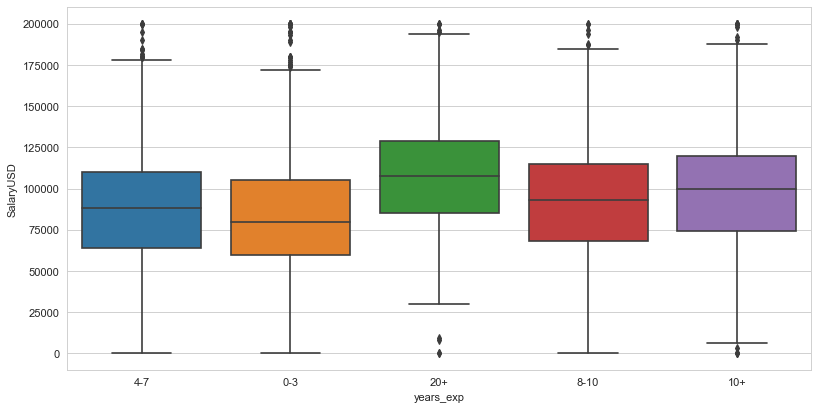

In [19]:
plt.figure(figsize=(12,6), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(data = df_unskew, x="years_exp", y="SalaryUSD")

## JobTitle

In [20]:
df1 = df.groupby('job').describe()['SalaryUSD'].reset_index()
df2 = df.groupby('job').describe()['YearsWithThisTypeOfJob'].reset_index()
df1['Expr'] = df2['mean']
df1

,job,count,mean,std,min,25%,50%,75%,max,Expr
0,analyst,354.0,74877.880610,77571.321123,38.736,55000.0,70000.0,86375.0,1450000.0,5.624294
1,architect,533.0,119307.350844,46112.885830,58.000,90000.0,120000.0,140000.0,350000.0,7.270169
2,consultant,3.0,114333.333333,49943.301186,61000.000,91500.0,122000.0,141000.0,160000.0,5.000000
3,data scientist,28.0,111428.321429,48374.649081,45000.000,74000.0,111000.0,136750.0,225000.0,5.714286
4,dba,3529.0,91164.300218,55185.913370,56.000,65000.0,90000.0,112840.0,1450000.0,7.360725
5,developer,1640.0,84733.769138,53436.412575,0.000,60000.0,82985.0,105000.0,1375000.0,7.250610
6,engineer,301.0,100265.285714,61854.772507,7500.000,70000.0,95000.0,120000.0,650000.0,7.023256
7,manager,394.0,114933.818528,67564.747006,1967.000,82875.0,110000.0,135000.0,1000000.0,6.360406
8,other,107.0,88953.176822,64180.742342,3600.000,59000.0,80000.0,97000.0,486000.0,8.149533
9,sales,1.0,300000.000000,NaN,300000.000,300000.0,300000.0,300000.0,300000.0,7.000000


## deMoivre's equation analysis

In [21]:
def simulation(df, country):
    df_usa = df[df['Country'] == country].copy()
    true_mean = df_usa['SalaryUSD'].mean()
    
    x_list = [x for x in range(1,len(df_usa), 1)]
    plot_df = pd.DataFrame(x_list, columns = ['x'])

    num_iter = 3

    for r in range(num_iter):

        mean_list = []
        for x in range(1,len(df_usa), 1):
            r_sample = int(random.sample([i for i in range(100)], 1)[0])
            mean_list.append(np.mean([i for i in df_usa['SalaryUSD'].sample(n=x, random_state=r_sample)]))

        plot_df['realisation '+str(r)] = pd.DataFrame(mean_list)
        
    return plot_df, true_mean

In [22]:
def geom_scatter(plot_df, true_mean, country):
    fig = plt.figure(figsize=(12,6), dpi=80, facecolor='w', edgecolor='k')
    ax1 = sns.scatterplot(data = plot_df, x = 'x', y = 'realisation 0')  
    ax2 = sns.scatterplot(data = plot_df, x = 'x', y = 'realisation 1', ax=ax1)
    ax3 = sns.scatterplot(data = plot_df, x = 'x', y = 'realisation 2', ax=ax1) 
    ax1.plot([0, max(plot_df['x'])], [true_mean, true_mean], 'k--', lw=2)

    ax1.set_xlabel("sample size")
    ax1.set_ylabel("mean salary")
    ax1.set_title(country)
    plt.show()

In [23]:
pd.DataFrame(df.groupby('Country').describe()['SalaryUSD']).reset_index().sort_values(by = 'count', ascending = False).head(10)

,Country,count,mean,std,min,25%,50%,75%,max
81,United States,4509.0,107517.140668,57177.291044,92.270,85000.000,102000.0,122000.0,1450000.0
80,United Kingdom,667.0,65566.590900,40704.078143,8000.000,47586.745,60000.0,74000.0,832031.0
11,Canada,244.0,74856.309344,25320.063876,0.000,60000.000,70000.0,84000.0,180000.0
2,Australia,185.0,92893.314162,45040.372660,112.000,71200.000,84500.0,100000.0,486000.0
33,India,112.0,33226.408929,78978.596849,430.000,11000.000,16000.0,25500.0,684000.0
25,Germany,97.0,83695.917526,80376.152511,30000.000,60000.000,72000.0,88000.0,800000.0
71,Sweden,87.0,62227.620690,14577.245774,6700.000,54500.000,62666.0,71700.0,88900.0
51,Netherlands,82.0,60869.704951,39286.597771,44.806,45500.000,56070.0,68512.5,368900.0
52,New Zealand,58.0,94279.413793,81386.291566,35362.000,64000.000,74000.0,91825.0,628857.0
69,South Africa,57.0,54704.394737,24272.967665,1467.000,43000.000,55000.0,65000.0,120000.0


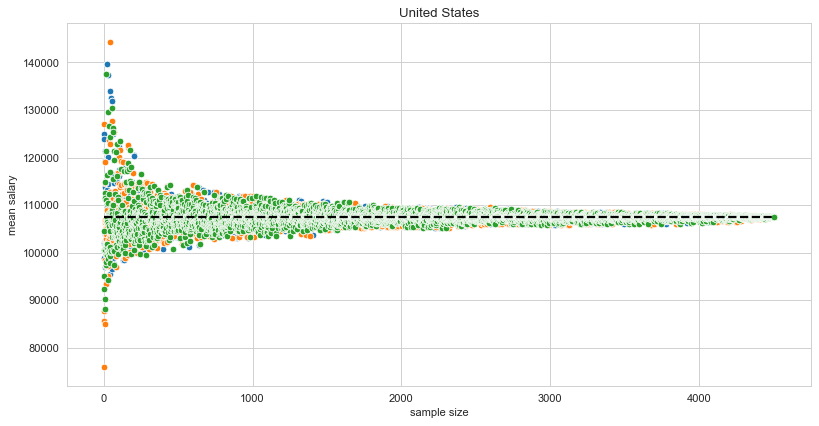

In [24]:
df_usa, true_mean = simulation(df, 'United States')
geom_scatter(df_usa, true_mean, 'United States')

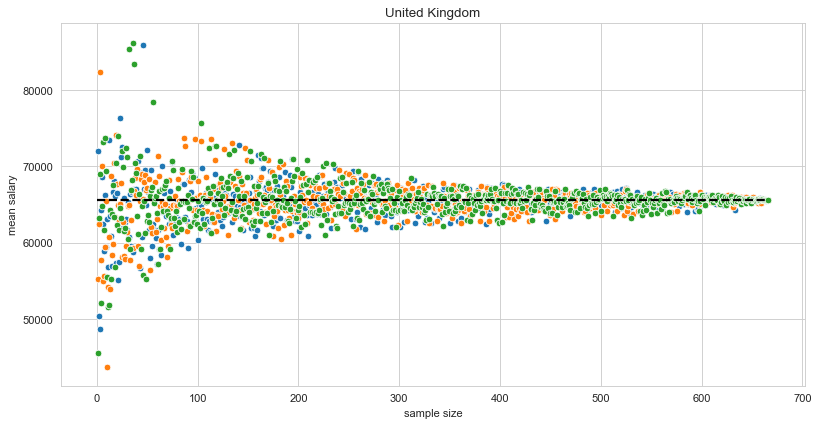

In [25]:
df_uk, true_mean = simulation(df, 'United Kingdom')
geom_scatter(df_uk, true_mean, 'United Kingdom')

In [26]:
df_country = pd.DataFrame(df.groupby('Country').describe()['SalaryUSD']).reset_index().sort_values(by = 'count', ascending = False).head(10)
df_country.columns = ['Country', 'Size', 'Mean', 'Std', 'min', '25%', '50%', '75%', 'max']
df_country = df_country.drop(['min', '25%', '50%', '75%', 'max'], axis = 1)
df_country

,Country,Size,Mean,Std
81,United States,4509.0,107517.140668,57177.291044
80,United Kingdom,667.0,65566.590900,40704.078143
11,Canada,244.0,74856.309344,25320.063876
2,Australia,185.0,92893.314162,45040.372660
33,India,112.0,33226.408929,78978.596849
25,Germany,97.0,83695.917526,80376.152511
71,Sweden,87.0,62227.620690,14577.245774
51,Netherlands,82.0,60869.704951,39286.597771
52,New Zealand,58.0,94279.413793,81386.291566
69,South Africa,57.0,54704.394737,24272.967665


In [27]:
df_country['Std Error'] = df_country['Std'] / df_country['Size'].apply(lambda x:np.sqrt(x))

In [28]:
df_country.sort_values(by = 'Mean', ascending = False)

,Country,Size,Mean,Std,Std Error
81,United States,4509.0,107517.140668,57177.291044,851.497658
52,New Zealand,58.0,94279.413793,81386.291566,10686.543629
2,Australia,185.0,92893.314162,45040.372660,3311.434056
25,Germany,97.0,83695.917526,80376.152511,8160.961822
11,Canada,244.0,74856.309344,25320.063876,1620.950989
80,United Kingdom,667.0,65566.590900,40704.078143,1576.068200
71,Sweden,87.0,62227.620690,14577.245774,1562.844792
51,Netherlands,82.0,60869.704951,39286.597771,4338.478946
69,South Africa,57.0,54704.394737,24272.967665,3215.033107
33,India,112.0,33226.408929,78978.596849,7462.775934
